In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

5
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(60000,)
0
9


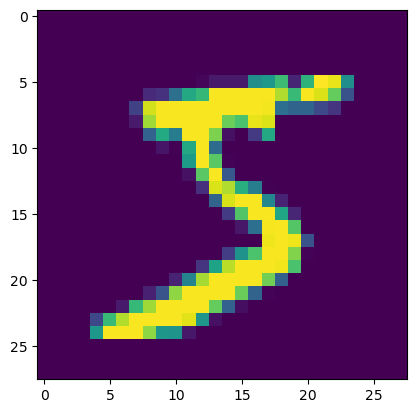

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])
print(y_train[0])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.min())
print(y_train.max())

In [3]:
# normalize between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Change from 2 vectors to 3
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 7s 6ms/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9491 - val_loss: 0.0591 - val_sparse_categorical_accuracy: 0.9795
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0529 - sparse_categorical_accuracy: 0.9832 - val_loss: 0.0379 - val_sparse_categorical_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0348 - val_sparse_categorical_accuracy: 0.9883
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0281 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0293 - val_sparse_categorical_accuracy: 0.9898
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0218 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.0403 - val_sparse_categorical_accuracy: 0.9878
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0172 - sparse_categorica

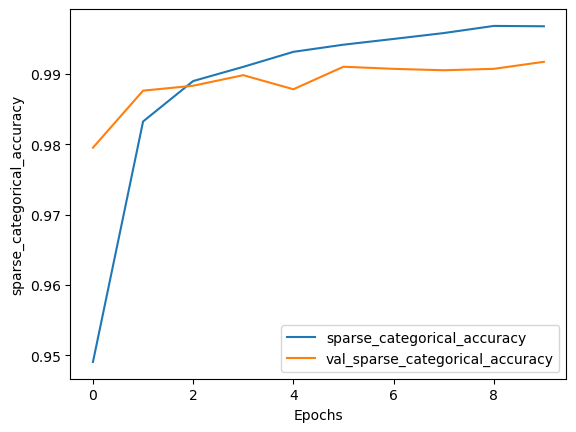

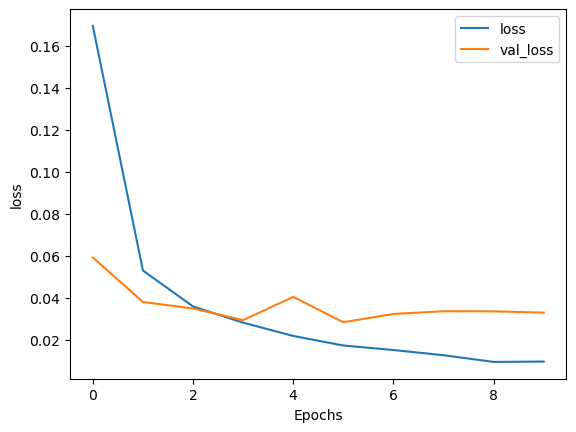

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "sparse_categorical_accuracy")
plot_graphs(history, "loss")

In [11]:
y_pred = model.predict(x_test)
y_classes = np.argmax(y_pred, axis=1)

In [14]:
y_classes[23], y_test[23]

(5, 5)